## Bitcoin Time Series Forecasting


The purpose of this kernel is to make forecasting of Bitcoin prices by a simple study of time series. Data is extracted from [cryptocompare](https://min-api.cryptocompare.com/documentation?key=Historical&cat=dataExchangeHistoday) which is a website specialized in the history of exchange currencies and cryptocurrencies. The data provided is pretty good so there is almost no data pre-processing to do

As mentioned above, 
we're going to be more interested in the values of Bitcoin compared to the US dollar, Bitcoin is the longest running and most well known cryptocurrency, first released as open source in 2009 by the anonymous Satoshi Nakamoto. Bitcoin serves as a decentralized medium of digital exchange, with transactions verified and recorded in a public distributed ledger (the blockchain) without the need for a trusted record keeping authority or central intermediary.


This Kernel is divided into two parts:

* Data Exploration
* Time Series Analysis

## Data Exploration

Importing Libraries

In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

from plotly import tools # data visualization
import plotly.plotly as py
from plotly.offline import init_notebook_mode, iplot
init_notebook_mode(connected=True)
import plotly.graph_objs as go
import warnings
warnings.filterwarnings('ignore')

Load dataset

In [2]:
df = pd.read_pickle('data/df.pkl')
with pd.option_context("display.max_rows", 10):
    display(df)

,close,high,low,open,volumefrom,volumeto
time,,,,,,
2013-03-11,48.40,48.47,45.54,46.00,41390.18,1.970814e+06
2013-03-12,44.29,48.40,36.65,48.40,183411.75,8.014902e+06
2013-03-13,46.92,47.30,43.75,44.29,49514.60,2.298258e+06
2013-03-14,47.17,47.99,46.05,46.92,37041.72,1.752628e+06
2013-03-15,46.95,47.45,46.40,47.17,20286.44,9.542857e+05
...,...,...,...,...,...,...
2020-07-03,9066.46,9127.05,9047.38,9092.80,21807.46,1.984281e+08
2020-07-04,9142.20,9195.91,9052.40,9066.46,16185.04,1.475983e+08
2020-07-05,9081.44,9152.87,8935.90,9142.20,17548.22,1.590064e+08


**Each row matches with the daily open/close/low/high/volumefrom/volumeto values of Bitcoin versus USD**

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2677 entries, 2013-03-11 to 2020-07-07
Data columns (total 6 columns):
close         2677 non-null float64
high          2677 non-null float64
low           2677 non-null float64
open          2677 non-null float64
volumefrom    2677 non-null float64
volumeto      2677 non-null float64
dtypes: float64(6)
memory usage: 146.4 KB


**Some important information:**<br>
<br>
- There are 7 columns in the dataset.<br>
- There are 2675 records in total.<br>
- There are no null records in data. It's good.<br>
- Data types are float64 and datetime64[ns].<br>
- Memory usage: 146.4 MB.<br>

**I use Plotly to create the plots of daily historical Opens/Closes Bitcoin prices**

In [4]:
df = df.reset_index()
trace1 = go.Scatter(
    x = df['time'],
    y = df['open'].astype(float),
    mode = 'lines',
    name = 'Opens'
)

trace2 = go.Scatter(
    x = df['time'],
    y = df['close'].astype(float),
    mode = 'lines',
    name = 'Closes'
)

layout = dict(
    title='Daily Historical Opens/Closes Bitcoin Prices (2013-2020) with the Slider ',
    xaxis=dict(
        rangeselector=dict(
            buttons=list([
                #change the count to desired amount of months.
                dict(count=1,
                     label='1m',
                     step='month',
                     stepmode='backward'),
                dict(count=6,
                     label='6m',
                     step='month',
                     stepmode='backward'),
                dict(count=12,
                     label='1y',
                     step='month',
                     stepmode='backward'),
                dict(count=36,
                     label='3y',
                     step='month',
                     stepmode='backward'),
                dict(step='all')
            ])
        ),
        rangeslider=dict(
            visible = True
        ),
        type='date'
    )
)

data = [trace1,trace2]
fig = dict(data=data, layout=layout)
iplot(fig, filename = "Time Series O/C with Rangeslider")

**I use Plotly to create the plots of daily historical Highs/Lows Bitcoin prices**

In [5]:
trace1 = go.Scatter(
    x = df['time'],
    y = df['high'].astype(float),
    mode = 'lines',
    name = 'Highs'
)

trace2 = go.Scatter(
    x = df['time'],
    y = df['low'].astype(float),
    mode = 'lines',
    name = 'Lows'
)

layout = dict(
    title='Daily Historical Highs/Lows Bitcoin Prices (2013-2020) with the Slider ',
    xaxis=dict(
        rangeselector=dict(
            buttons=list([
                #change the count to desired amount of months.
                dict(count=1,
                     label='1m',
                     step='month',
                     stepmode='backward'),
                dict(count=6,
                     label='6m',
                     step='month',
                     stepmode='backward'),
                dict(count=12,
                     label='1y',
                     step='month',
                     stepmode='backward'),
                dict(count=36,
                     label='3y',
                     step='month',
                     stepmode='backward'),
                dict(step='all')
            ])
        ),
        rangeslider=dict(
            visible = True
        ),
        type='date'
    )
)

data = [trace1,trace2]
fig = dict(data=data, layout=layout)
iplot(fig, filename = "Time Series H/L with Rangeslider")

**Bitcoin volumefro vs volumeto distribution**

In [6]:
trace = go.Scattergl(
    y = df['volumeto'].astype(float),
    x = df['volumefrom'].astype(float),
    mode = 'markers',
    marker = dict(
        color = '#FFBAD2',
        line = dict(width = 1)
    )
)
layout = go.Layout(
    title='Bitcoin Volumefrom vs Volumeto Distribution',
    xaxis=dict(
        title='Weighted Price',
        titlefont=dict(
            #family='Courier New, monospace',
            size=18,
            color='#7f7f7f'
        )
    ),
    yaxis=dict(
        title='Volume BTC',
        titlefont=dict(
            #family='Courier New, monospace',
            size=18,
            color='#7f7f7f'
        )))
data = [trace]
fig = go.Figure(data=data, layout=layout)
iplot(fig, filename='Compare_volume')

### Forecasting with XGBoost

For forecasting time series, I'll use XGBoost. it's an implementation of gradient boosted decision trees designed for speed and performance.

First, I split data in training set and test set. I made the choice to train my model on all the available data, except the last seven days that I used as test set.

In [7]:
def split_data(df):
    """
    split data : last 7 days as test set, and all data before 7 last days as training set
    """
    test_set = df.iloc[-7:]
    training_set = df.iloc[:-7]
    return training_set, test_set

Then, I create new features from the time feature

In [8]:
def create_features(df, label=None):
    """
    Creates time series features from time feature
    """
    df['dayofweek'] = df['time'].dt.dayofweek
    df['quarter'] = df['time'].dt.quarter
    df['month'] = df['time'].dt.month
    df['year'] = df['time'].dt.year
    df['dayofyear'] = df['time'].dt.dayofyear
    df['dayofmonth'] = df['time'].dt.day
    df['weekofyear'] = df['time'].dt.weekofyear
    
    X = df[['dayofweek','quarter','month','year',
           'dayofyear','dayofmonth','weekofyear']]
    if label:
        y = df[label]
        return X, y
    return X

In [9]:
data_train, data_test = split_data(df)
X_train, y_train = create_features(data_train, label='close')
X_test, y_test = create_features(data_test, label='close')

In [10]:
print('The shape of X_train : ', X_train.shape)
print('The shape of y_train : ', y_train.shape)
print('The shape of X_test : ', X_test.shape)
print('The shape of y_test : ', y_test.shape)

The shape of X_train :  (2670, 7)
The shape of y_train :  (2670,)
The shape of X_test :  (7, 7)
The shape of y_test :  (7,)


**Here I use a basic XGBRegressor model and grid search method  to better choose hyperparameters**

In [11]:
from xgboost.sklearn import XGBRegressor
from sklearn.model_selection import GridSearchCV

xgb = XGBRegressor()
parameters = {'nthread':[4],
              'objective':['reg:linear'],
              'learning_rate': [ 0.01, 0.1, 0.5],
              'max_depth': [3, 5, 7],
              'min_child_weight': [2,4,6],
              'silent': [1],
              'subsample': [0.2,0.7],
              'colsample_bytree': [0.7],
              'n_estimators': [300]}

xgb_grid = GridSearchCV(xgb,
                        parameters,
                        cv = 5,
                        n_jobs = 5,
                        verbose=True,
                       error_score='r2')

xgb_grid.fit(X_train,
         y_train)

Fitting 5 folds for each of 54 candidates, totalling 270 fits


[Parallel(n_jobs=5)]: Using backend LokyBackend with 5 concurrent workers.
[Parallel(n_jobs=5)]: Done  40 tasks      | elapsed:   13.5s
[Parallel(n_jobs=5)]: Done 190 tasks      | elapsed:  1.1min
[Parallel(n_jobs=5)]: Done 270 out of 270 | elapsed:  1.6min finished


[07:44:35] WARNING: /Users/travis/build/dmlc/xgboost/src/objective/regression_obj.cu:170: reg:linear is now deprecated in favor of reg:squarederror.
[07:44:35] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:480: 
Parameters: { silent } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[07:44:35] WARNING: /Users/travis/build/dmlc/xgboost/src/objective/regression_obj.cu:170: reg:linear is now deprecated in favor of reg:squarederror.


GridSearchCV(cv=5, error_score='r2',
             estimator=XGBRegressor(base_score=None, booster=None,
                                    colsample_bylevel=None,
                                    colsample_bynode=None,
                                    colsample_bytree=None, gamma=None,
                                    gpu_id=None, importance_type='gain',
                                    interaction_constraints=None,
                                    learning_rate=None, max_delta_step=None,
                                    max_depth=None, min_child_weight=None,
                                    missing=nan, monotone_constraints=None,
                                    n_estim...
                                    validate_parameters=None, verbosity=None),
             iid='deprecated', n_jobs=5,
             param_grid={'colsample_bytree': [0.7],
                         'learning_rate': [0.01, 0.1, 0.5],
                         'max_depth': [3, 5, 7], 'min_child_

**R2 squared for  trainning and test set**

In [12]:
print('R2 squared for training set :', str(xgb_grid.score(X_train,y_train)))
print('R2 squared for test set :', str(xgb_grid.score(X_test,y_test)))

R2 squared for training set : 0.9975064499715536
R2 squared for test set : -68.46404883005383


**Forecast values for X_test**

In [13]:
data_test['Prediction'] = xgb_grid.predict(X_test)
data_all = pd.concat([data_test, data_train], sort=False)

**Plot the forecast values with the actuals values**

Text(0, 0.5, 'BTC/USD Values')

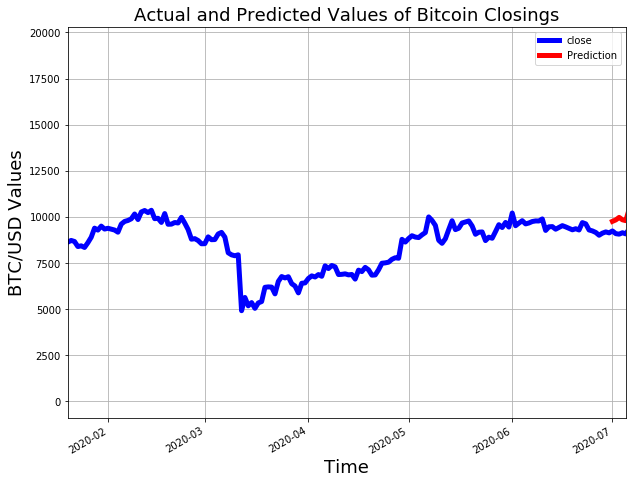

In [14]:
data_all = data_all.set_index('time')
ax = data_all[['close','Prediction']].plot(figsize=(10, 8),
                                         lw=5,
                                         legend=True,
                                         xlim=('20-Jan-2020','05-July-2020'),
                                         color=['blue','red'],
                                        grid = 'axis',
                                        #title = 'actual and predicted values ​​of Bitcoin closings',
                                        colormap='jet')
ax.set_title("Actual and Predicted Values of Bitcoin Closings",fontsize=18)
ax.set_xlabel("Time",fontsize=18)
ax.set_ylabel("BTC/USD Values",fontsize=18)

In [15]:
best_params = pd.DataFrame({'Parameter' : list(xgb_grid.best_params_.keys()),
                                       'Best Value' : list(xgb_grid.best_params_.values())})
print(best_params)

          Parameter  Best Value
0  colsample_bytree         0.7
1     learning_rate         0.1
2         max_depth           5
3  min_child_weight           6
4      n_estimators         300
5           nthread           4
6         objective  reg:linear
7            silent           1
8         subsample         0.7


**Save the Model**

In [16]:
import pickle

pkl_filename = "Model/pickle_model.pkl"
with open(pkl_filename, 'wb') as file:
    pickle.dump(xgb_grid, file)